In [3]:



# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import lightgbm as lgb




import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut



import warnings # supress warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)

df=pd.read_csv('current_qb.csv')


In [25]:
tempdf=df['passer_player_name']

In [33]:
tempdf=tempdf.drop_duplicates()

In [35]:
tempdf

0                B.Mayfield
85                  B.Young
95               D.Prescott
208                D.Ridder
220               G.Minshew
241                 J.Allen
333                  J.Goff
450               J.Herbert
511                 J.Hurts
559               J.Winston
640                K.Murray
699               K.Pickett
721               L.Jackson
796                 M.Jones
837              M.Stafford
965               P.Mahomes
1069               R.Wilson
1213             T.Lawrence
1260           T.Tagovailoa
1303    D.Thompson-Robinson
1306                G.Smith
1341             J.Browning
1342                J.Dobbs
1356               J.Fields
1386                B.Purdy
1405               T.DeVito
1409               S.Howell
1422                W.Levis
Name: passer_player_name, dtype: object

In [43]:
df2=pd.read_csv('temp.csv')

In [52]:
fulldf.to_csv('qb_data_new.csv')

In [90]:
columns_to_keep = ['passing_yards', 'def_complete_pass_allowed', 
        '2023_qb_yards_avg', 'age', 'dvoa', 'anya']

In [101]:
df= fulldf[columns_to_keep]

In [81]:
df

,passing_yards,age,dvoa,anya
0,285.0,28,-5.9,6.10
1,278.0,28,-5.9,6.10
2,334.0,28,-5.9,6.10
3,189.0,28,-5.9,6.10
4,342.0,28,-5.9,6.10
...,...,...,...,...
1422,262.0,24,-7.8,5.97
1423,199.0,24,-7.8,5.97
1424,238.0,24,-7.8,5.97
1425,158.0,24,-7.8,5.97


In [104]:
X = df.drop('passing_yards', axis=1)
y = df['passing_yards']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [98]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [99]:
y_pred = lm.predict(X_test_scaled)

In [86]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mse**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 57.58538731193517
Mean Squared Error (MSE): 5330.247346900314
Root Mean Squared Error (RMSE): 73.0085429720407


##LIght   gbm

In [87]:


# Create LightGBM datasets
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Set parameters for LightGBM

params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rage': 0.05,
    'metric': {'l2', 'l1'},
    'verbose': -1
}


# Train the LightGBM model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = mse**0.5
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 5656.745597672711
Root Mean Squared Error (RMSE): 75.21133955510106


Feature Importance Scores:
anya: 2643521.213904023
age: 1184352.5716240406
dvoa: 549370.7439869642


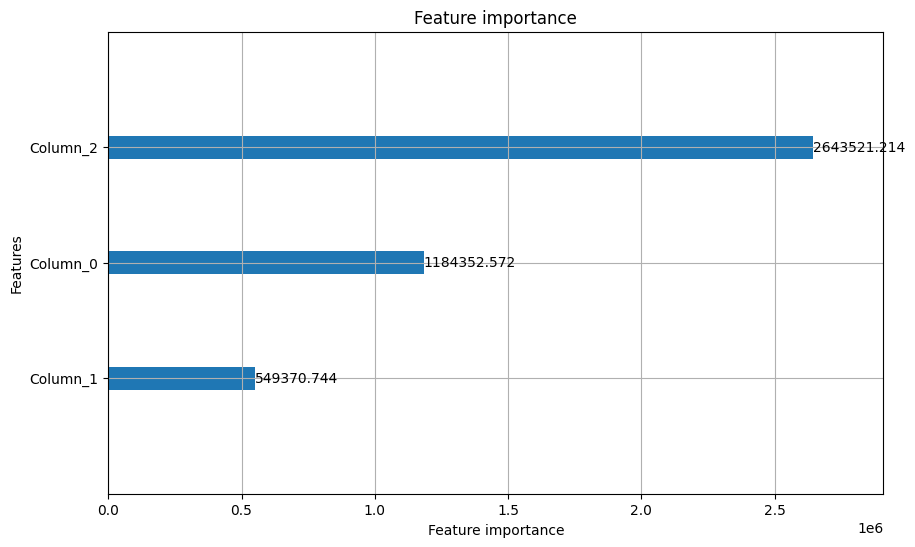

In [89]:
feature_importance = bst.feature_importance(importance_type='gain')

# Map feature names to indices
feature_names = X_test.columns
feature_indices = {feature: idx for idx, feature in enumerate(feature_names)}

# Sort features by importance
sorted_feature_indices = sorted(feature_indices.items(), key=lambda x: feature_importance[x[1]], reverse=True)

# Print feature importance scores
print("Feature Importance Scores:")
for feature, idx in sorted_feature_indices:
    print(f"{feature}: {feature_importance[idx]}")

# Plot feature importance
lgb.plot_importance(bst, importance_type='gain', max_num_features=10, figsize=(10, 6))
plt.show()

In [108]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha = 0.5)
rdg.fit(X_train_scaled, y_train)


Ridge(alpha=0.5)

In [109]:
rdg.score(X_test_scaled, y_test)

0.04611544852534788